In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/4568317687_3f89622f76.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4571923094_b9cefa9438_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/15002906952_cab2cb29cf.jpg'),
 PosixPath('datasets/flower_photos/dandelion/140951103_69847c0b7c.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3530500952_9f94fb8b9c_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/509239741_28e2cfe492_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12407768513_3440238148_n.jpg')]

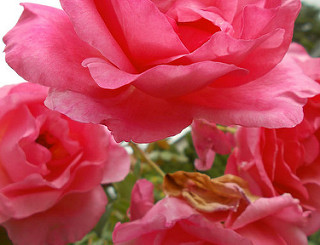

In [8]:
PIL.Image.open(str(roses[1]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/509239741_28e2cfe492_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14970973709_968910640e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12407768513_3440238148_n.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/509239741_28e2cfe492_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape


(333, 500, 3)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [14]:
X = np.array(X)
y = np.array(y)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 13s 42ms/step - loss: 1.4018 - accuracy: 0.4044
Epoch 2/30
86/86 [==============================] - 4s 42ms/step - loss: 1.0157 - accuracy: 0.6007
Epoch 3/30
86/86 [==============================] - 4s 42ms/step - loss: 0.7729 - accuracy: 0.7108
Epoch 4/30
86/86 [==============================] - 4s 41ms/step - loss: 0.5742 - accuracy: 0.7925
Epoch 5/30
86/86 [==============================] - 4s 42ms/step - loss: 0.3870 - accuracy: 0.8648
Epoch 6/30
86/86 [==============================] - 4s 42ms/step - loss: 0.2044 - accuracy: 0.9317
Epoch 7/30
86/86 [==============================] - 4s 42ms/step - loss: 0.1152 - accuracy: 0.9640
Epoch 8/30
86/86 [==============================] - 4s 42ms/step - loss: 0.0513 - accuracy: 0.9862
Epoch 9/30
86/86 [==============================] - 4s 42ms/step - loss: 0.0531 - accuracy: 0.9844
Epoch 10/30
86/86 [==============================] - 4s 42ms/step - loss: 0.1198 - accuracy: 0.9684
Epoch 11

In [19]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 27ms/step - loss: 2.6526 - accuracy: 0.6525


[2.652636766433716, 0.6525054574012756]

In [22]:
data_augmentation = keras.Sequential(
  [
    
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [23]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 6s 49ms/step - loss: 1.3986 - accuracy: 0.4132
Epoch 2/30
86/86 [==============================] - 4s 48ms/step - loss: 1.0795 - accuracy: 0.5480
Epoch 3/30
86/86 [==============================] - 4s 49ms/step - loss: 0.9622 - accuracy: 0.6177
Epoch 4/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8807 - accuracy: 0.6512
Epoch 5/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8123 - accuracy: 0.6864
Epoch 6/30
86/86 [==============================] - 4s 47ms/step - loss: 0.7558 - accuracy: 0.7042
Epoch 7/30
86/86 [==============================] - 4s 48ms/step - loss: 0.7183 - accuracy: 0.7257
Epoch 8/30
86/86 [==============================] - 4s 48ms/step - loss: 0.6871 - accuracy: 0.7369
Epoch 9/30
86/86 [==============================] - 4s 48ms/step - loss: 0.6615 - accuracy: 0.7551
Epoch 10/30
86/86 [==============================] - 4s 48ms/step - loss: 0.6160 - accuracy: 0.7653
Epoch 11/

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 21ms/step - loss: 1.2932 - accuracy: 0.7026


[1.2931897640228271, 0.7026143670082092]